In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [96]:
# Генерация данных
df = np.array([[i, np.random.rand() * 3 + i + 5] for i in range(1, 31)])
Y = df[:, 1]
X = np.column_stack((df[:, 0], np.ones(len(df))))
df

array([[ 1.        ,  7.72617921],
       [ 2.        ,  8.84935866],
       [ 3.        ,  8.78907431],
       [ 4.        ,  9.6108707 ],
       [ 5.        , 11.65046618],
       [ 6.        , 13.88388463],
       [ 7.        , 13.52412445],
       [ 8.        , 14.72109057],
       [ 9.        , 16.69085458],
       [10.        , 15.86981775],
       [11.        , 17.34521528],
       [12.        , 18.15116613],
       [13.        , 18.73601895],
       [14.        , 21.26319256],
       [15.        , 22.54249902],
       [16.        , 22.82522922],
       [17.        , 22.10306909],
       [18.        , 25.67320244],
       [19.        , 24.78461258],
       [20.        , 27.10118961],
       [21.        , 26.17704535],
       [22.        , 27.6103519 ],
       [23.        , 30.50790027],
       [24.        , 31.407155  ],
       [25.        , 32.2837357 ],
       [26.        , 31.20869062],
       [27.        , 32.21969979],
       [28.        , 34.05786859],
       [29.        ,

In [97]:
# Функция для вычисления значения функции потерь
def loss_function(w0, w1):
    return np.sum((Y - np.dot(X, [w0, w1]))**2)

In [93]:
# Метод наименьших квадратов для поиска оптимальных значений параметров
optimal_params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
optimal_params

array([1.00157756, 6.59188583])

In [98]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model = LinearRegression()

# обучим нашу модель

model.fit(X, Y)

print(model.coef_, model.intercept_)


[0.98266342 0.        ] 6.728196825855095


In [99]:
par = np.array([0.98266342, 6.728196825855095])
par

array([0.98266342, 6.72819683])

In [100]:
# Функция для вычисления градиента
def grad(w0, w1):
    point = np.random.randint(0, len(df))
    gradient_w0 = -2 * X[point, 0] * (Y[point] - np.dot(X[point], [w0, w1]))
    gradient_w1 = -2 * (Y[point] - np.dot(X[point], [w0, w1]))
    return np.array([gradient_w0, gradient_w1])

In [101]:
w_0 = np.array([0, 0])
lum = 0.00001
convergence = False
iterations = 0

In [102]:
# Стохастический градиентный спуск
res = [w_0]
while not convergence:
    gradient = grad(*w_0)
    w_1 = w_0 - lum * gradient
    res.append(w_1)
    if np.linalg.norm(w_1 - w_0) < 0.0001:
        convergence = True
    w_0 = w_1
    iterations += 1

Оптимальные значения параметров через МНК: [0.98266342 6.72819683]
Оптимальные значения параметров через стохастический градиентный спуск: [1.19811969 0.07386705]


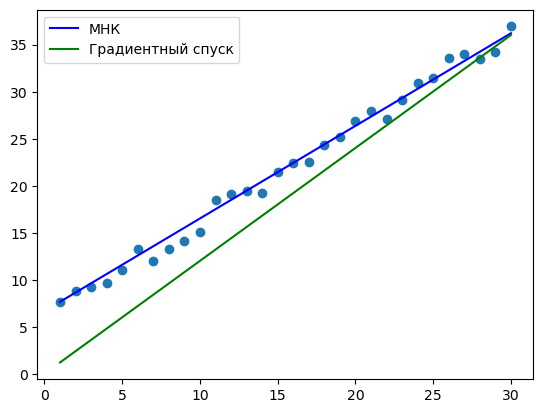

In [103]:
# Вывод результатов и визуализация
print("Оптимальные значения параметров через МНК:", par)
print("Оптимальные значения параметров через стохастический градиентный спуск:", w_0)

plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], par[1] + par[0] * data[:, 0], color='blue', label='МНК')
plt.plot(data[:, 0], w_0[1] + w_0[0] * data[:, 0], color='green', label='Градиентный спуск')
plt.legend()
plt.show()